# 패키지 실행 및 구글 드라이브 연결

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#https://seaborn.pydata.org/tutorial/aesthetics.html

sns.set_style("whitegrid") # choose a style for seaborn figure

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# health_data 데이터 가져오기

In [4]:
import pandas as pd

# csv 데이터 가져오기, 한글 데이터의 경우 인코딩 변경 
health = pd.read_csv('/content/health_data.csv')

display(health.head())
print(health.info()) 
print(health.describe()) 

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

# 한글 폰트 적용

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 산점도

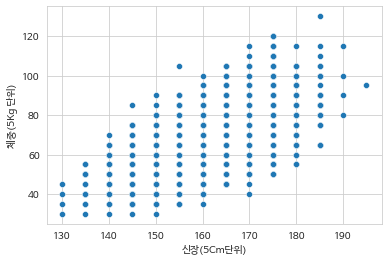

In [61]:
sns.scatterplot(data = health, x = '신장(5Cm단위)', y = '체중(5Kg 단위)')

인사이트: 신장과 체중의 관계를 산점도로 표현했다. 이를 통해 (예외는 있지만) 대체적으로 키가 커질 수록 체중도 늘어나는 양상을 보이는 것을 알 수 있었다.

# 막대그래프

In [39]:
df_health1 = health.groupby('연령대코드(5세단위)' , as_index = False).agg( meanhwy = ('수축기혈압', 'mean'))
df_health1

,연령대코드(5세단위),meanhwy
0,9,120.862314
1,10,121.842951
2,11,123.141268
3,12,124.214286
4,13,126.187093
5,14,128.543839
6,15,129.729970
7,16,131.456583
8,17,131.053719
9,18,129.040816


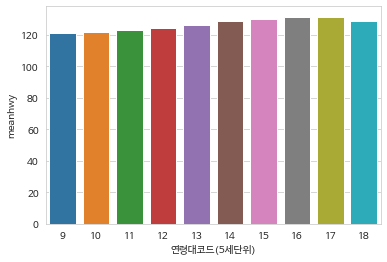

In [40]:
sns.barplot(data = df_health1, x = '연령대코드(5세단위)', y = 'meanhwy')

In [24]:
df_health1['연령대코드(5세단위)'].value_counts().index

Int64Index([16, 17, 15, 18, 14, 13, 12, 11, 10, 9], dtype='int64')

인사이트: 연령대에 따라 수축기혈압수치가 어떻게 되는지 알아보았다. 그 결과 연령대코드 16>17>15>18>14>13>12>11>10>9 순서로 수축기혈압수치가 높았다.

이를 통해 고연령군에 속하는 70~84세의 수축기혈압수치가 저연령대보다 평균적으로 높다는 것을 알 수 있다.

하지만 오히려 최고연령군 85세 이상 연령대는 70~84세보다 수축기혈압수치가 낮게 나타났다. 

In [45]:
df_health2 = health.groupby('연령대코드(5세단위)' , as_index = False).agg( meanhwy = ('이완기혈압', 'mean'))
df_health2

,연령대코드(5세단위),meanhwy
0,9,76.317388
1,10,77.081812
2,11,77.377642
3,12,77.389853
4,13,77.104302
5,14,76.644550
6,15,75.673591
7,16,75.207283
8,17,74.690083
9,18,73.530612


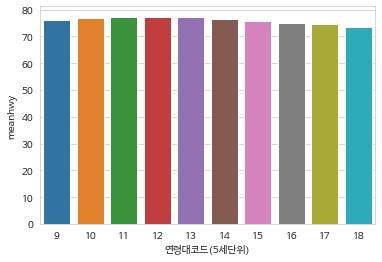

In [46]:
sns.barplot(data = df_health2, x = '연령대코드(5세단위)', y = 'meanhwy')

인사이트: 연령대에 따라 이완기혈압수치가 어떻게 되는지 알아보았다.이완기혈압수치는 수축기혈압수치보다 연령대별로 차이가 크지 않았다. 

하지만 대체적으로 연령대가 커질수록 이완기혈압수치가 낮아지는 양상을 보이고 있다. 

#선그래프

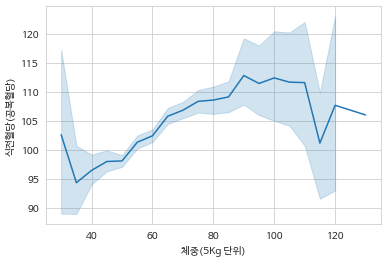

In [60]:
sns.lineplot(data = health, x = '체중(5Kg 단위)', y = '식전혈당(공복혈당)')

인사이트: 대체로 체중이 높을수록 식전혈당(공복혈당)이 높게 나타나는 모양을 보이고 있으나, 예외적으로 40kg 이하 구간, 그리고 110~120kg 구간에서는 다르게 나타나고 있다. 

40kg 이하가 40kg이상보다 식전혈당 수치가 높고, 110~120kg가 100kg보다 낮은 식전혈당 수치를 기록한다.

# 파이그래프

In [65]:
pd.DataFrame(health['성별코드'].value_counts()/health['성별코드'].count())

,성별코드
M,0.5138
F,0.4862


In [66]:
sex = pd.DataFrame(health['성별코드'].value_counts()/health['성별코드'].count())
sex.reset_index(inplace = True)
sex

,index,성별코드
0,M,0.5138
1,F,0.4862


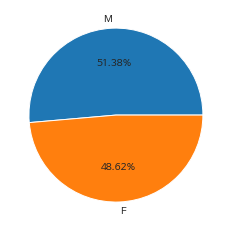

In [68]:
plt.pie(x = list(sex['성별코드']), 
           labels = list(sex['index']),
           autopct = '%.2f%%')
plt.show()

인사이트: 2020년도 1만건의 건강검진정보 샘플 중 남성의 비율은 51.38%, 여성의 비율을 48.62%로 남성의 샘플이 여성의 샘플보다 약 3% 정도 더 많은 것을 알 수 있다. 